In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
import pickle
import numpy as np

import crflux.models as pm
import mceq_underground_helpers_cs as mh

In [29]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'
angles = mh.angles

In [5]:
with open("/hetghome/khymon/cs-files/R_value_const_pi-air_k-air_sibyll23c_smooth_oneregion_k-pi.pkl", "rb") as f:
    results = pickle.load(f)

In [6]:
results

{('1.5',
  '0.8',
  '0.8',
  '2212',
  'jan',
  '3.65'): array([0.77598335, 0.76860718, 0.76407247]),
 ('1.5',
  '0.8',
  '0.8',
  '2212',
  'apr',
  '3.65'): array([0.83573282, 0.82696783, 0.82088047]),
 ('1.5',
  '0.8',
  '0.8',
  '2212',
  'jul',
  '3.65'): array([0.90242366, 0.88777335, 0.87472812]),
 ('1.5',
  '0.8',
  '0.9',
  '2212',
  'jan',
  '3.65'): array([0.79534132, 0.78847236, 0.78432878]),
 ('1.5',
  '0.8',
  '0.9',
  '2212',
  'apr',
  '3.65'): array([0.85619605, 0.84802576, 0.84238815]),
 ('1.5',
  '0.8',
  '0.9',
  '2212',
  'jul',
  '3.65'): array([0.92308936, 0.90898802, 0.89621319]),
 ('1.5',
  '0.8',
  '0.99',
  '2212',
  'jan',
  '3.65'): array([0.81051619, 0.80421666, 0.80057409]),
 ('1.5',
  '0.8',
  '0.99',
  '2212',
  'apr',
  '3.65'): array([0.87266671, 0.86567887, 0.85969173]),
 ('1.5',
  '0.8',
  '0.99',
  '2212',
  'jul',
  '3.65'): array([0.93945081, 0.9259024 , 0.91356693]),
 ('1.5',
  '0.8',
  '1.0',
  '2212',
  'jan',
  '3.65'): array([0.81214767, 0.8

In [7]:
cs = ['0.8', '0.9','0.99', '1.0', '1.01', '1.1', '1.2']
angles = mh.angles

In [8]:
# Define fixed parameters
fixed_depth = '3.5'
fixed_ptype = '2212'
fixed_season = 'apr'

# Initialize empty matrix
matrix = np.zeros((len(cs), len(cs),3))

for i in range(len(cs)):
    for j in range(len(cs)):
        key = (fixed_depth, cs[i], cs[j], fixed_ptype, fixed_season,'3.65')
        value = results.get(key, np.nan)  # Use NaN if key is missing
                
        # Check if value is a sequence (like a list or array), and if so, take the first value or some aggregate
        #if isinstance(value, (list, np.ndarray)):
        #    value = np.mean(value)  # You can also use np.mean(value) or np.sum(value) depending on the context - for one particular angle
        
        matrix[i, j] = value # i = cs_pion, j = cs_kaon 

In [9]:
matrix.shape

(7, 7, 3)

In [10]:
matrix[:,1] #example for cs_kaon = 0.9

array([[0.90349748, 0.89759392, 0.89041311],
       [0.94523208, 0.9423223 , 0.93836559],
       [0.98278294, 0.98220986, 0.98089316],
       [0.98617925, 0.98574342, 0.98487956],
       [0.98941747, 0.98923376, 0.98874712],
       [1.0166986 , 1.01880057, 1.0208342 ],
       [1.04374811, 1.04798739, 1.05320366]])

In [18]:
def dRdsig(R_array, sigma_array):
    # Initialize an empty array for the slopes with shape (6, 6, 3)
    slope = np.ndarray(shape=(R_array.shape[0] - 1, R_array.shape[1] - 1, 3)) 
    
    # Loop over each entry in the resulting slope array
    for i in range(R_array.shape[0] - 1):
        for j in range(R_array.shape[1] - 1):
            R1 = R_array[i, j]
            R2 = R_array[i+1, j+1]
            sig1 = sigma_array[i]
            sig2 = sigma_array[i+1]

            # Compute dsigma and apply sign change if sig1 < 1
            dsigma = sig2 - sig1
            if sig1 < 1:
                dsigma = -abs(dsigma)

            # Compute the slope
            slope[i, j] = (R2 - R1) / dsigma

    return slope

In [19]:
cs =[0.8,0.9,0.99,1.0,1.01,1.1,1.2]
dRdSig_matrix = dRdsig(matrix,cs)

In [22]:
dRdSig_matrix

array([[[-0.57952394, -0.61239742, -0.65204531],
        [-0.5412114 , -0.57388313, -0.61269734],
        [-0.43321497, -0.46353494, -0.49717472],
        [-0.43329214, -0.46364603, -0.49735942],
        [-0.52723048, -0.55915846, -0.59966525],
        [-0.52742198, -0.559708  , -0.60098124]],

       [[-0.60026099, -0.63120118, -0.66814317],
        [-0.55658589, -0.58628938, -0.62514518],
        [-0.43350503, -0.46053841, -0.49375108],
        [-0.43352497, -0.46056671, -0.49384049],
        [-0.53972153, -0.56955794, -0.60895866],
        [-0.53963953, -0.56955355, -0.60902514]],

       [[-1.99598766, -2.06748244, -2.18868397],
        [-1.59052163, -1.64449484, -1.768802  ],
        [-0.46751928, -0.49116548, -0.53713425],
        [-0.46585671, -0.48949216, -0.52781409],
        [-1.41647972, -1.47022789, -1.56649631],
        [-1.39923201, -1.45259636, -1.55108131]],

       [[ 1.99401266,  2.06618118,  2.19279612],
        [ 1.58863714,  1.64245219,  1.75272636],
        [ 0.46

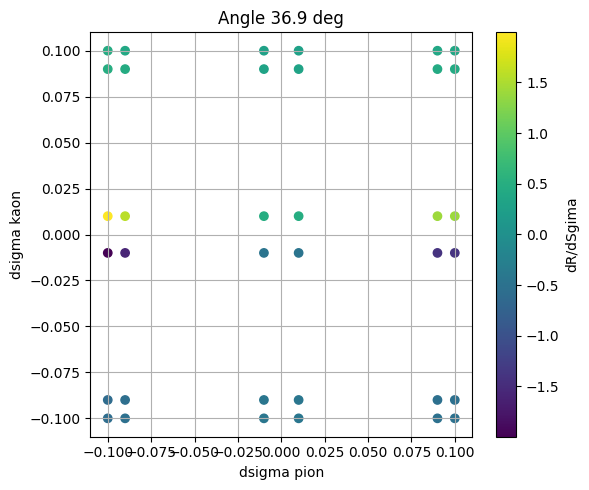

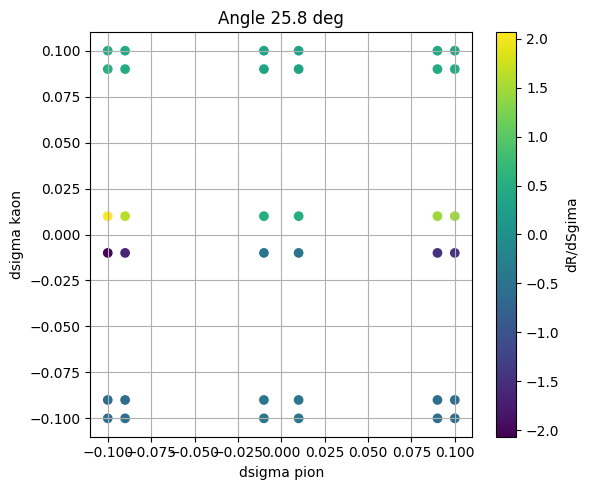

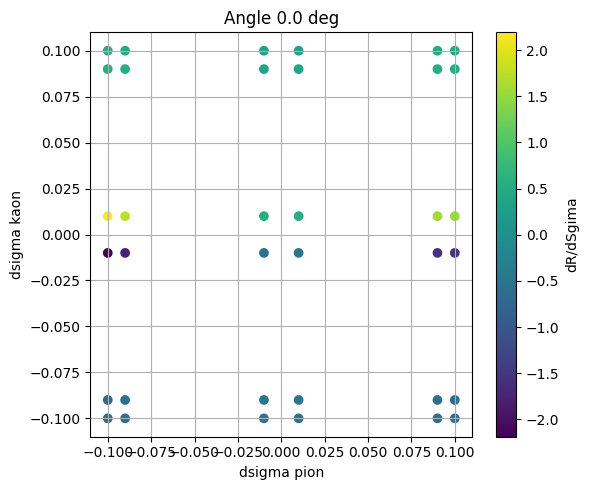

In [33]:
# Apply sign correction: if cs[i] < 1, make dsigma negative

cs = [0.8, 0.9, 0.99, 1.0, 1.01, 1.1, 1.2]  # list

# Convert to NumPy array
cs = np.array(cs)

# Compute dsigma
dsigma = np.diff(cs)

# Apply sign correction: if cs[i] < 1, make dsigma negative
dsigma_signed = np.where(cs[:-1] < 1, -np.abs(dsigma), np.abs(dsigma))

x, y = np.meshgrid(dsigma_signed, dsigma_signed)
z_min = np.min(dRdSig_matrix)
z_max = np.max(dRdSig_matrix)

# Flatten x and y for scatter plot
x_flat = x.flatten()
y_flat = y.flatten()

# Loop through each z-dimension and plot separately
for i in range(3):
    z_flat = dRdSig_matrix[:, :, i].flatten()  # Extract z-values for current dimension
    
    plt.figure(figsize=(6, 5))
    sc = plt.scatter(x_flat, y_flat, c=z_flat, cmap='viridis')
    plt.colorbar(sc, label=f'dR/dSgima')  # Add color bar
    plt.xlabel('dsigma pion')
    plt.ylabel('dsigma kaon')
    plt.title(f'Angle {np.round(angles[i],decimals=1)} deg')
    plt.grid(True)

    #plt.show()
    plt.tight_layout()
    plt.savefig(plot_dir + 'dRdsigma_pion_kaon_angle' + str(np.round(angles[i],decimals=1)) + '.png')